In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from aind_analysis_arch_result_access.han_pipeline import get_session_table
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = get_session_table()

In [55]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Get colors from the "Set2" colormap
colormap = cm.get_cmap("Set2")
colormap(1)

/tmp/ipykernel_2583/3615073194.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = cm.get_cmap("Set2")


(0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0)

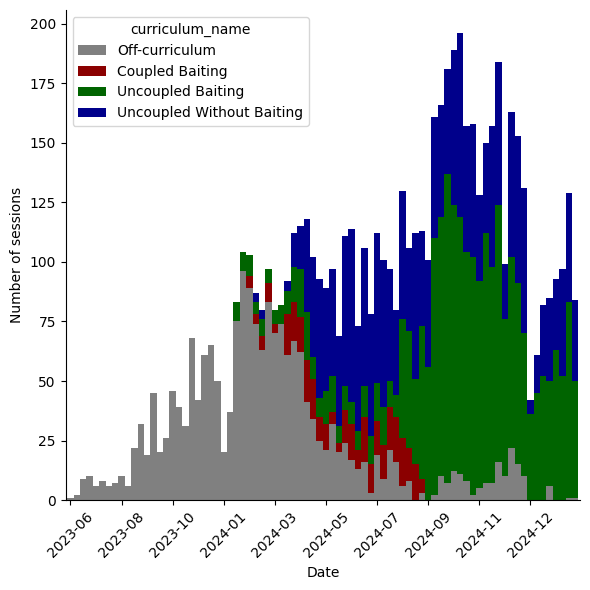

In [56]:
def plot_session_counts_over_time(
    df,
    time_bin="D",
    bar_width=0.8,
    group_by="curriculum_name",
    group_rename=None,
    group_custom_order=None,
    group_custom_color=None,
):
    # Count number of sessions per day per type
    session_counts = (
        df.groupby([pd.Grouper(key="session_date", freq=time_bin), group_by])
        .size()
        .unstack(fill_value=0)
    )
    if group_rename is not None:
        session_counts = session_counts.rename(columns=group_rename)
    if group_custom_order is not None:
        session_counts = session_counts[group_custom_order]

    color_mapping = {
        "Coupled Baiting": "darkred",
        "Uncoupled Baiting": "darkgreen",
        "Uncoupled Without Baiting": "darkblue",
        "Off-curriculum": "gray",
    }

    # Plot stacked bar chart
    fig, ax = plt.subplots(figsize=(6, 6))
    session_counts.plot(
        kind="bar",
        stacked=True,
        ax=ax,
        color=[color_mapping.get(x, "gray") for x in session_counts.columns],
        width=bar_width,
    )
    ax.set_xlabel("Date")
    ax.set_ylabel("Number of sessions")
    ax.legend(title=group_by)

    # Format x-axis to show only year and month
    ax.set_xticks([])  # Hide all default x-ticks
    ax.set_xticks(
        range(0, len(session_counts), max(1, len(session_counts) // 10))
    )  # Set sparse ticks
    ax.set_xticklabels(
        session_counts.index[:: max(1, len(session_counts) // 10)].strftime("%Y-%m"),
        rotation=45,
    )
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.xticks(rotation=45)
    plt.tight_layout()

    return fig


# Display the plot
fig = plot_session_counts_over_time(
    df,
    time_bin="W",
    bar_width=1,
    group_rename={
        "Coupled Baiting": "Coupled Baiting",
        "Uncoupled Baiting": "Uncoupled Baiting",
        "Uncoupled Without Baiting": "Uncoupled Without Baiting",
        "None": "Off-curriculum",
    },
    group_custom_order=["Off-curriculum", "Coupled Baiting", "Uncoupled Baiting", "Uncoupled Without Baiting"],
)
plt.show()

In [44]:
    color_mapping = {
        "Coupled Baiting": "darkred",
        "Uncoupled Baiting": "darkgreen",
        "Uncoupled Without Baiting": "darkblue",
        "None": "gray",
    }
    list(color_mapping.keys())

['Coupled Baiting', 'Uncoupled Baiting', 'Uncoupled Without Baiting', 'None']